In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
nb_samples = [5*i for i in range(1,13)]
t_ls = np.loadtxt('twitter_ls.txt')
t_cs = np.loadtxt('twitter_cs.txt')
cardinality = 35
order = 4
name_basis = 'TD'

In [6]:
def get_mu(y, N_trial):
  return 1/N_trial * np.sum(np.log10(y), axis=1)

def get_sig(y, mu, N_trial):
  return np.sqrt(1/(N_trial - 1) * np.sum((np.log10(y) - np.repeat(mu.reshape(mu.shape[0],1), y.shape[1], axis=1))**2, axis=1))

In [7]:
mu_ls = get_mu(t_ls, 10)
sig_ls = get_sig(t_ls,mu_ls,10)
mu_cs = get_mu(t_cs, 10)
sig_cs = get_sig(t_cs, mu_cs, 10)

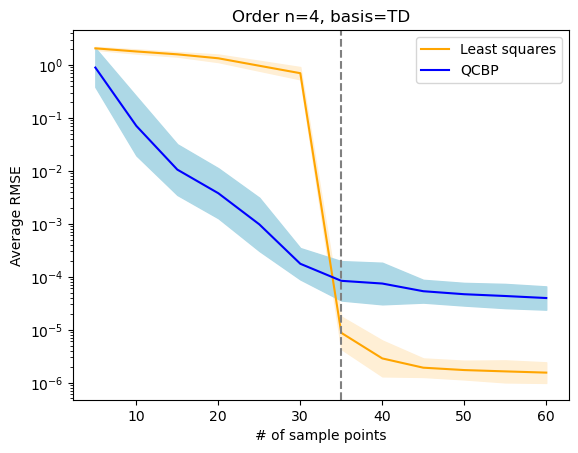

In [8]:


fig, ax = plt.subplots()
ax.plot(nb_samples, 10**mu_ls, 'orange', label='Least squares')
ax.plot(nb_samples, 10**mu_cs, 'blue', label='QCBP')
ax.fill_between(nb_samples, 10**(mu_ls - sig_ls), 10**(mu_ls + sig_ls), color='papayawhip')
ax.fill_between(nb_samples, 10**(mu_cs - sig_cs), 10**(mu_cs + sig_cs), color='lightblue')
ax.axvline(x=cardinality, color='grey', linestyle='--')
ax.set_yscale('log')
ax.set_xlabel('# of sample points')
ax.set_ylabel('Average RMSE')
ax.set_title('Order n={}, basis={}'.format(str(order), name_basis))
ax.legend()
plt.savefig('twiiter_plot.pdf')